<a href="https://colab.research.google.com/github/Tarnished2/DataScientist/blob/main/DataPreparationusingPython/9.HandlingOutliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mengakses link ke google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Mendefinisikan data path

path_data = '/content/gdrive/MyDrive/SIB/3. Data Preparation using Python/3.2 Handling Outlier/'

In [ ]:
# Membaca directory
import os
os.listdir(path_data)

['[REV] Breakoutroom Meet 9.ipynb',
 'salesmonthly.csv',
 'winequalityN.csv',
 'free_advertising_data.csv',
 'TestMatches_Dataset.csv',
 'Handling_Outlier.ipynb']

In [ ]:
# Import Packages
import pandas as pd
import numpy as np
import statistics
from scipy.stats import chi2
from matplotlib import patches
import matplotlib.pyplot as plt

### Case 1 dengan free_advertising_data.csv

Apakah terdeteksi multivariat outlier pada Radio dan Newspaper?

In [ ]:
# Load dataset
df_data = pd.read_csv(path_data+'free_advertising_data.csv')
df_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         197 non-null    float64
 1   Radio      197 non-null    float64
 2   Newspaper  197 non-null    float64
 3   Sales      197 non-null    float64
dtypes: float64(4)
memory usage: 6.3 KB


In [ ]:
df = df_data[['Radio', 'Newspaper']]
df = df.to_numpy()

Menghitung dengan Jarak Mahalanobis

In [ ]:
# Covariance matrix
covariance  = np.cov(df , rowvar=False)

# Covariance matrix power of -1
covariance_pm1 = np.linalg.matrix_power(covariance, -1)

# Center point
centerpoint = np.mean(df , axis=0)

In [ ]:
# Jarak antara center point and masing-masing point observasi
distances = []
for i, val in enumerate(df):
    p1 = val
    p2 = centerpoint
    distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
    distances.append(distance)
distances = np.array(distances)

# Nilai cutoff (threshold) dari Chi-Sqaure Distribution untuk deteksi outlier
cutoff = chi2.ppf(0.95, df.shape[1])

# Index outliers
outlierIndexes = np.where(distances > cutoff )

print('--- Index Outliers ----')
print(outlierIndexes)

print('--- Observasi terdeteksi sebagai outlier -----')
print(df[ distances > cutoff , :])

--- Index Outliers ----
(array([ 74, 126, 136, 162]),)
--- Observasi terdeteksi sebagai outlier -----
[[43.7 89.4]
 [49.   3.2]
 [43.9  1.7]
 [ 3.4 84.8]]


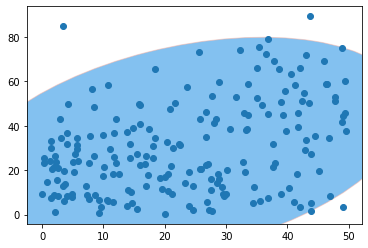

In [ ]:
## ellipse dimensions
pearson = covariance[0, 1]/np.sqrt(covariance[0, 0] * covariance[1, 1])
ell_radius_x = np.sqrt(1 + pearson)
ell_radius_y = np.sqrt(1 - pearson)
lambda_, v = np.linalg.eig(covariance)
lambda_ = np.sqrt(lambda_)

# Ellipse patch
ellipse = patches.Ellipse(xy=(centerpoint[0], centerpoint[1]),
                  width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='#fab1a0')
ellipse.set_facecolor('#0984e3')
ellipse.set_alpha(0.5)
fig = plt.figure()
ax = plt.subplot()
ax.add_artist(ellipse)
plt.scatter(df[: , 0], df[ : , 1])
plt.show()

Ada berapa banyak outlier pada Radio dan Newspaper?

In [ ]:
remove_outlier=df[distances <= cutoff,:]

In [ ]:
print("Banyaknya data asli yang masih ada outlier: ",len(df))
print("Banyaknya data setelah menghapus outlier: ",len(remove_outlier))

Banyaknya data asli yang masih ada outlier:  197
Banyaknya data setelah menghapus outlier:  193


handling multivariate outlier pertama

In [ ]:
df = remove_outlier
# Covariance matrix
covariance  = np.cov(df , rowvar=False)

# Covariance matrix power of -1
covariance_pm1 = np.linalg.matrix_power(covariance, -1)

# Center point
centerpoint = np.mean(df , axis=0)

In [ ]:
# Jarak antara center point and masing-masing point observasi
distances = []
for i, val in enumerate(df):
    p1 = val
    p2 = centerpoint
    distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
    distances.append(distance)
distances = np.array(distances)

# Nilai cutoff (threshold) dari Chi-Sqaure Distribution untuk deteksi outlier
cutoff = chi2.ppf(0.95, df.shape[1])

# Index outliers
outlierIndexes = np.where(distances > cutoff )

print('--- Index Outliers ----')
print(outlierIndexes)

print('--- Observasi terdeteksi sebagai outlier -----')
print(df[ distances > cutoff , :])

--- Index Outliers ----
(array([  5,  35, 115, 130]),)
--- Observasi terdeteksi sebagai outlier -----
[[48.9 75. ]
 [43.8  5. ]
 [36.9 79.2]
 [47.   8.5]]


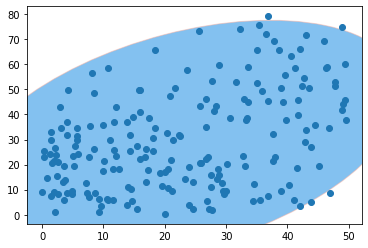

In [ ]:
## ellipse dimensions
pearson = covariance[0, 1]/np.sqrt(covariance[0, 0] * covariance[1, 1])
ell_radius_x = np.sqrt(1 + pearson)
ell_radius_y = np.sqrt(1 - pearson)
lambda_, v = np.linalg.eig(covariance)
lambda_ = np.sqrt(lambda_)

# Ellipse patch
ellipse = patches.Ellipse(xy=(centerpoint[0], centerpoint[1]),
                  width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='#fab1a0')
ellipse.set_facecolor('#0984e3')
ellipse.set_alpha(0.5)
fig = plt.figure()
ax = plt.subplot()
ax.add_artist(ellipse)
plt.scatter(df[: , 0], df[ : , 1])
plt.show()

handling multivariate outlier kedua

In [ ]:
remove_outlier=df[distances <= cutoff,:]

In [ ]:
print("Banyaknya data asli yang masih ada outlier: ",len(df))
print("Banyaknya data setelah menghapus outlier: ",len(remove_outlier))

Banyaknya data asli yang masih ada outlier:  193
Banyaknya data setelah menghapus outlier:  189


In [ ]:
df = remove_outlier
# Covariance matrix
covariance  = np.cov(df , rowvar=False)

# Covariance matrix power of -1
covariance_pm1 = np.linalg.matrix_power(covariance, -1)

# Center point
centerpoint = np.mean(df , axis=0)

In [ ]:
# Jarak antara center point and masing-masing point observasi
distances = []
for i, val in enumerate(df):
    p1 = val
    p2 = centerpoint
    distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
    distances.append(distance)
distances = np.array(distances)

# Nilai cutoff (threshold) dari Chi-Sqaure Distribution untuk deteksi outlier
cutoff = chi2.ppf(0.95, df.shape[1])

# Index outliers
outlierIndexes = np.where(distances > cutoff )

print('--- Index Outliers ----')
print(outlierIndexes)

print('--- Observasi terdeteksi sebagai outlier -----')
print(df[ distances > cutoff , :])

--- Index Outliers ----
(array([ 84, 182]),)
--- Observasi terdeteksi sebagai outlier -----
[[25.5 73.4]
 [42.   3.6]]


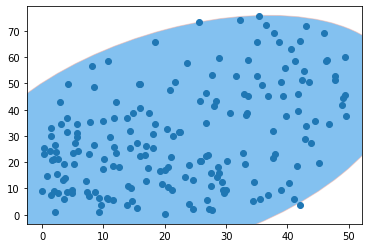

In [ ]:
## ellipse dimensions
pearson = covariance[0, 1]/np.sqrt(covariance[0, 0] * covariance[1, 1])
ell_radius_x = np.sqrt(1 + pearson)
ell_radius_y = np.sqrt(1 - pearson)
lambda_, v = np.linalg.eig(covariance)
lambda_ = np.sqrt(lambda_)

# Ellipse patch
ellipse = patches.Ellipse(xy=(centerpoint[0], centerpoint[1]),
                  width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='#fab1a0')
ellipse.set_facecolor('#0984e3')
ellipse.set_alpha(0.5)
fig = plt.figure()
ax = plt.subplot()
ax.add_artist(ellipse)
plt.scatter(df[: , 0], df[ : , 1])
plt.show()

handling multivariate outlier ketiga

In [ ]:
remove_outlier=df[distances <= cutoff,:]

In [ ]:
print("Banyaknya data asli yang masih ada outlier: ",len(df))
print("Banyaknya data setelah menghapus outlier: ",len(remove_outlier))

Banyaknya data asli yang masih ada outlier:  189
Banyaknya data setelah menghapus outlier:  187


In [ ]:
df = remove_outlier
# Covariance matrix
covariance  = np.cov(df , rowvar=False)

# Covariance matrix power of -1
covariance_pm1 = np.linalg.matrix_power(covariance, -1)

# Center point
centerpoint = np.mean(df , axis=0)

In [ ]:
# Jarak antara center point and masing-masing point observasi
distances = []
for i, val in enumerate(df):
    p1 = val
    p2 = centerpoint
    distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
    distances.append(distance)
distances = np.array(distances)

# Nilai cutoff (threshold) dari Chi-Sqaure Distribution untuk deteksi outlier
cutoff = chi2.ppf(0.95, df.shape[1])

# Index outliers
outlierIndexes = np.where(distances > cutoff )

print('--- Index Outliers ----')
print(outlierIndexes)

print('--- Observasi terdeteksi sebagai outlier -----')
print(df[ distances > cutoff , :])

--- Index Outliers ----
(array([130]),)
--- Observasi terdeteksi sebagai outlier -----
[[35.4 75.6]]


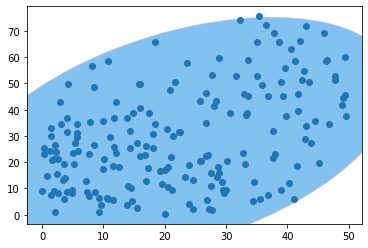

In [ ]:
## ellipse dimensions
pearson = covariance[0, 1]/np.sqrt(covariance[0, 0] * covariance[1, 1])
ell_radius_x = np.sqrt(1 + pearson)
ell_radius_y = np.sqrt(1 - pearson)
lambda_, v = np.linalg.eig(covariance)
lambda_ = np.sqrt(lambda_)

# Ellipse patch
ellipse = patches.Ellipse(xy=(centerpoint[0], centerpoint[1]),
                  width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='#fab1a0')
ellipse.set_facecolor('#0984e3')
ellipse.set_alpha(0.5)
fig = plt.figure()
ax = plt.subplot()
ax.add_artist(ellipse)
plt.scatter(df[: , 0], df[ : , 1])
plt.show()

### Case 2 gunakan data TestMatches_Dataset.csv

In [ ]:
# Load dataset
df_data2 = pd.read_csv(path_data+'TestMatches_Dataset.csv')
df_data2.head()

,MatchKey,BattingTeam,Score,Wickets,InningsResult,Overs,RPO,Lead,Inns,Result,Opposition,HostCountry,StartDate,Unnamed: 13
0,1,England,464,10,End,186.0,2.49,464,1,won,Australia,Australia,12/13/1901,NaN
1,1,Australia,168,10,End,72.1,2.33,-296,2,lost,England,Australia,12/13/1901,NaN
2,1,Australia,172,10,End,57.4,3,-124,3,lost,England,Australia,12/13/1901,NaN
3,2,Australia,112,10,End,32.1,3.49,112,1,won,England,Australia,1/1/1902,NaN
4,2,England,61,10,End,15.4,3.96,-51,2,lost,Australia,Australia,1/1/1902,NaN


In [ ]:
df_data2 = df_data2.drop(['Unnamed: 13'], axis=1)

In [ ]:
df_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8291 entries, 0 to 8290
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MatchKey       8291 non-null   int64  
 1   BattingTeam    8291 non-null   object 
 2   Score          8291 non-null   int64  
 3   Wickets        8291 non-null   int64  
 4   InningsResult  8291 non-null   object 
 5   Overs          8291 non-null   float64
 6   RPO            8291 non-null   object 
 7   Lead           8291 non-null   int64  
 8   Inns           8291 non-null   int64  
 9   Result         8291 non-null   object 
 10  Opposition     8291 non-null   object 
 11  HostCountry    8291 non-null   object 
 12  StartDate      8291 non-null   object 
dtypes: float64(1), int64(5), object(7)
memory usage: 842.2+ KB


In [ ]:
df_data2.describe()

,MatchKey,Score,Wickets,Overs,Lead,Inns
count,8291.000000,8291.000000,8291.000000,8291.000000,8291.000000,8291.000000
mean,1129.238451,273.767579,8.544084,94.452032,116.431673,2.373779
std,651.011231,135.117055,2.726067,43.713040,231.131180,1.073233
min,1.000000,0.000000,0.000000,0.000000,-702.000000,1.000000
25%,565.000000,178.000000,8.000000,63.300000,-56.000000,1.000000
50%,1133.000000,255.000000,10.000000,91.300000,116.000000,2.000000
75%,1695.000000,353.000000,10.000000,123.450000,294.000000,3.000000
max,2249.000000,952.000000,10.000000,335.200000,903.000000,4.000000


- Apakah terdeteksi outlier pada kolom Score, Overs dan Lead?

1. Score

Text(0.5, 0, 'Score')

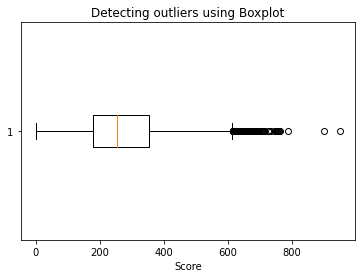

In [ ]:
# Deteksi dengan boxplot
plt.boxplot(list(df_data2.Score), vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Score')

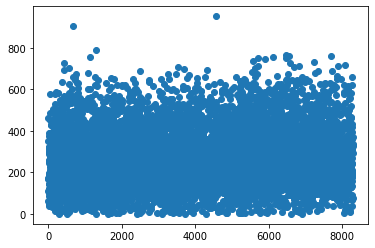

In [ ]:
# Deteksi dengan scatter plot
plt.scatter(range(0,len(list(df_data2.Score))), list(df_data2.Score))
plt.show()

In [ ]:
# Fungsi Pendeteksian Outlier dengan IQR
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
sample_outliers = detect_outliers_iqr(df_data2.Score)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [616, 616, 616, 617, 617, 617, 619, 619, 619, 620, 620, 620, 620, 621, 621, 622, 622, 622, 624, 624, 624, 626, 627, 627, 627, 627, 628, 628, 628, 628, 629, 629, 629, 629, 630, 631, 631, 631, 631, 632, 633, 633, 636, 636, 637, 638, 641, 642, 642, 643, 643, 644, 644, 644, 644, 645, 648, 649, 649, 650, 651, 652, 652, 652, 652, 653, 653, 656, 657, 657, 658, 658, 659, 659, 659, 660, 662, 664, 671, 674, 674, 674, 675, 676, 680, 681, 682, 687, 687, 690, 692, 695, 699, 701, 705, 707, 708, 710, 713, 713, 715, 726, 729, 730, 735, 747, 749, 751, 756, 758, 759, 760, 765, 790, 903, 952]


In [ ]:
# Deteksi outlier dengan IQR
outliers = detect_outliers_iqr(list(df_data2.Score))
print("Outliers Overs from IQR method: ", outliers)
print("Banyaknya outlier: ",len(outliers))

Outliers Overs from IQR method:  [616, 616, 616, 617, 617, 617, 619, 619, 619, 620, 620, 620, 620, 621, 621, 622, 622, 622, 624, 624, 624, 626, 627, 627, 627, 627, 628, 628, 628, 628, 629, 629, 629, 629, 630, 631, 631, 631, 631, 632, 633, 633, 636, 636, 637, 638, 641, 642, 642, 643, 643, 644, 644, 644, 644, 645, 648, 649, 649, 650, 651, 652, 652, 652, 652, 653, 653, 656, 657, 657, 658, 658, 659, 659, 659, 660, 662, 664, 671, 674, 674, 674, 675, 676, 680, 681, 682, 687, 687, 690, 692, 695, 699, 701, 705, 707, 708, 710, 713, 713, 715, 726, 729, 730, 735, 747, 749, 751, 756, 758, 759, 760, 765, 790, 903, 952]
Banyaknya outlier:  116


Terdapat 116 nilai di atas yang dianggap sebagai outlier.

Cara 1 : Deleting

In [ ]:
# Deleting
tr = []
for j in list(df_data2.Score):
    f = j in outliers
    if f is False:
        tr.append(j)

In [ ]:
print("Banyaknya data sebelum diatasi outlier: ",len(list(df_data2.Score)))
print("Banyaknya data setelah diatasi outlier: ",len(tr))

Banyaknya data sebelum diatasi outlier:  8291
Banyaknya data setelah diatasi outlier:  8175


Text(0.5, 0, 'Score')

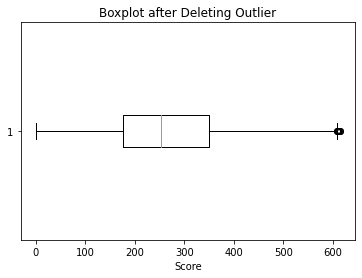

In [ ]:
# Boxplot setelah penghapusan data
plt.boxplot(tr, vert=False)
plt.title("Boxplot after Deleting Outlier")
plt.xlabel('Score')

Cara 2 : Replace dengan Median Data

In [ ]:
e = []
for y in list(df_data2.Score):
    ff = y in outliers
    if ff is True:
        y=statistics.median(list(df_data2.Score))
    else:
        y=y
    e.append(y)

In [ ]:
# Menghitung nilai mean dan median data
print("Mean data : ",statistics.mean(list(df_data2.Score)))
print("Median data : ",statistics.median(list(df_data2.Score)))
print("Mean data setelah replacing median : ",statistics.mean(e))
print("Median data setelah replacing median: ",statistics.median(e))

Mean data :  273.7675793028585
Median data :  255
Mean data setelah replacing median :  268.03147991798335
Median data setelah replacing median:  255


Text(0.5, 0, 'Score')

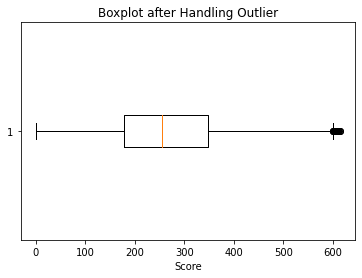

In [ ]:
# Boxplot setelah replace median
plt.boxplot(e, vert=False)
plt.title("Boxplot after Handling Outlier")
plt.xlabel('Score')

2. Overs

Text(0.5, 0, 'Overs')

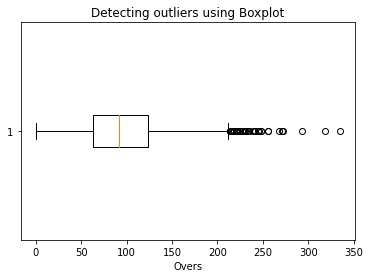

In [ ]:
# Deteksi dengan boxplot
plt.boxplot(list(df_data2.Overs), vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Overs')

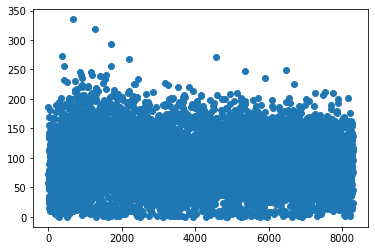

In [ ]:
# Deteksi dengan scatter plot
plt.scatter(range(0,len(list(df_data2.Overs))), list(df_data2.Overs))
plt.show()

In [ ]:
# Fungsi Pendeteksian Outlier dengan IQR
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
sample_outliers = detect_outliers_iqr(df_data2.Overs)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [214.0, 214.0, 214.2, 215.0, 215.5, 216.2, 217.4, 218.3, 220.0, 220.3, 220.3, 220.3, 221.0, 221.2, 221.3, 224.5, 224.5, 225.2, 225.2, 225.4, 227.0, 227.3, 229.4, 230.4, 232.0, 233.5, 233.5, 235.2, 235.3, 239.4, 240.0, 241.3, 241.5, 245.2, 245.4, 248.0, 248.5, 255.5, 256.1, 268.0, 271.0, 272.1, 293.1, 319.0, 335.2]


In [ ]:
# Deteksi outlier dengan IQR
outliers = detect_outliers_iqr(list(df_data2.Overs))
print("Outliers Overs from IQR method: ", outliers)
print("Banyaknya outlier: ",len(outliers))

Outliers Overs from IQR method:  [214.0, 214.0, 214.2, 215.0, 215.5, 216.2, 217.4, 218.3, 220.0, 220.3, 220.3, 220.3, 221.0, 221.2, 221.3, 224.5, 224.5, 225.2, 225.2, 225.4, 227.0, 227.3, 229.4, 230.4, 232.0, 233.5, 233.5, 235.2, 235.3, 239.4, 240.0, 241.3, 241.5, 245.2, 245.4, 248.0, 248.5, 255.5, 256.1, 268.0, 271.0, 272.1, 293.1, 319.0, 335.2]
Banyaknya outlier:  45


Terdapat 45 nilai di atas yang dianggap sebagai outlier.

Cara 1 : Deleting

In [ ]:
# Deleting
tr = []
for j in list(df_data2.Overs):
    f = j in outliers
    if f is False:
        tr.append(j)

In [ ]:
print("Banyaknya data sebelum diatasi outlier: ",len(list(df_data2.Overs)))
print("Banyaknya data setelah diatasi outlier: ",len(tr))

Banyaknya data sebelum diatasi outlier:  8291
Banyaknya data setelah diatasi outlier:  8246


Text(0.5, 0, 'Overs')

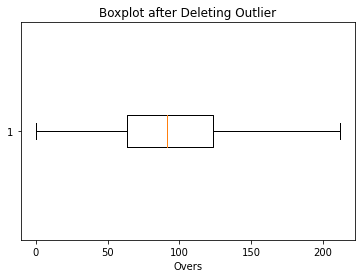

In [ ]:
# Boxplot setelah penghapusan data
plt.boxplot(tr, vert=False)
plt.title("Boxplot after Deleting Outlier")
plt.xlabel('Overs')

Cara 2 : Replace dengan Median Data

In [ ]:
e = []
for y in list(df_data2.Overs):
    ff = y in outliers
    if ff is True:
        y=statistics.median(list(df_data2.Overs))
    else:
        y=y
    e.append(y)

In [ ]:
# Menghitung nilai mean dan median data
print("Mean data : ",statistics.mean(list(df_data2.Overs)))
print("Median data : ",statistics.median(list(df_data2.Overs)))
print("Mean data setelah replacing median : ",statistics.mean(e))
print("Median data setelah replacing median: ",statistics.median(e))

Mean data :  94.45203232420697
Median data :  91.3
Mean data setelah replacing median :  93.65741165118804
Median data setelah replacing median:  91.3


Text(0.5, 0, 'Overs')

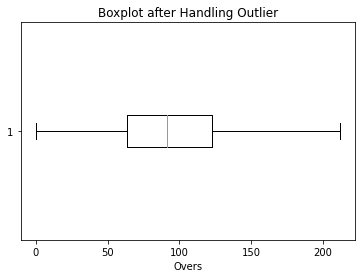

In [ ]:
# Boxplot setelah replace median
plt.boxplot(e, vert=False)
plt.title("Boxplot after Handling Outlier")
plt.xlabel('Overs')

3. Lead

Text(0.5, 0, 'Lead')

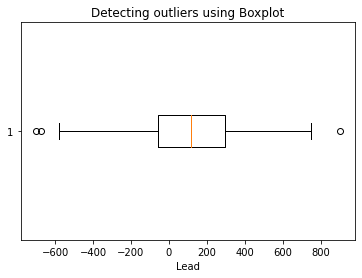

In [ ]:
# Deteksi dengan boxplot
plt.boxplot(list(df_data2.Lead), vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Lead')

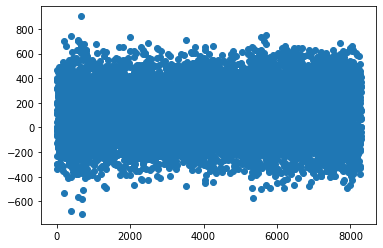

In [ ]:
# Deteksi dengan scatter plot
plt.scatter(range(0,len(list(df_data2.Lead))), list(df_data2.Lead))
plt.show()

In [ ]:
# Fungsi Pendeteksian Outlier dengan IQR
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
sample_outliers = detect_outliers_iqr(df_data2.Lead)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [-702, -675, 903]


In [ ]:
# Deteksi outlier dengan IQR
outliers = detect_outliers_iqr(list(df_data2.Lead))
print("Outliers Overs from IQR method: ", outliers)
print("Banyaknya outlier: ",len(outliers))

Outliers Overs from IQR method:  [-702, -675, 903]
Banyaknya outlier:  3


Terdapat 3 nilai di atas yang dianggap sebagai outlier.

Cara 1 : Deleting

In [ ]:
# Deleting
tr = []
for j in list(df_data2.Lead):
    f = j in outliers
    if f is False:
        tr.append(j)

In [ ]:
print("Banyaknya data sebelum diatasi outlier: ",len(list(df_data2.Lead)))
print("Banyaknya data setelah diatasi outlier: ",len(tr))

Banyaknya data sebelum diatasi outlier:  8291
Banyaknya data setelah diatasi outlier:  8288


Text(0.5, 0, 'Lead')

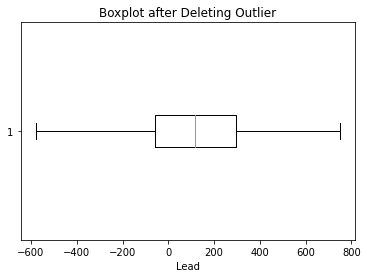

In [ ]:
# Boxplot setelah penghapusan data
plt.boxplot(tr, vert=False)
plt.title("Boxplot after Deleting Outlier")
plt.xlabel('Lead')

Cara 2 : Replace dengan Median Data

In [ ]:
e = []
for y in list(df_data2.Lead):
    ff = y in outliers
    if ff is True:
        y=statistics.median(list(df_data2.Lead))
    else:
        y=y
    e.append(y)

In [ ]:
# Menghitung nilai mean dan median data
print("Mean data : ",statistics.mean(list(df_data2.Lead)))
print("Median data : ",statistics.median(list(df_data2.Lead)))
print("Mean data setelah replacing median : ",statistics.mean(e))
print("Median data setelah replacing median: ",statistics.median(e))

Mean data :  116.43167289832348
Median data :  116
Mean data setelah replacing median :  116.53081654806417
Median data setelah replacing median:  116


Text(0.5, 0, 'Lead')

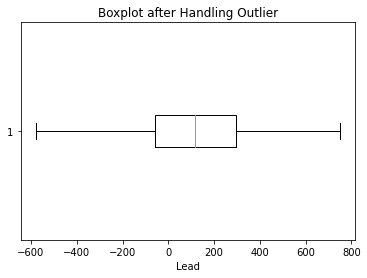

In [ ]:
# Boxplot setelah replace median
plt.boxplot(e, vert=False)
plt.title("Boxplot after Handling Outlier")
plt.xlabel('Lead')